<a href="https://colab.research.google.com/github/rajathAgalkote/BCG_PowerCo_CustomerChurn_Prediction/blob/main/Task-03/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import ast
import warnings
from google.colab import drive
from google.colab import files
from datetime import datetime
import os

%matplotlib inline

In [ ]:
# Setting plot style
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams["figure.autolayout"] = True

In [ ]:
# Ignoring all warnings

warnings.filterwarnings('ignore')

---
## 2. Load data

In [ ]:
# mount Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
clean_df = pd.read_csv("/content/drive/MyDrive/PowerCo_Forage/price_analysis_clean.csv")

We will use this dataframe later.

In [ ]:
price_df = pd.read_csv("/content/drive/MyDrive/PowerCo_Forage/price_data.csv")

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [ ]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [ ]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [ ]:
# client df
client_df = pd.read_csv("/content/drive/MyDrive/PowerCo_Forage/client_data.csv")

In [ ]:
df = pd.merge(price_df, client_df, on = 'id')

In [ ]:
df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,f,91.82,21.52,21.52,1,52.53,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0


In [ ]:
df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

### Average price change across periods

We can now enhance the feature that our colleague made by calculating the average price changes across individual periods, instead of the entire year.

This will also improve the granularity of the feature since we will be creating micro-features for the feature created by our colleague, that takes mean average prices between time periods.

In [ ]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [ ]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [ ]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,num_years_antig,origin_up,pow_max,churn,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,0.14855,0.0,0.14855,44.35582,0.0,44.35582
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,0.14855,0.0,0.14855,44.35582,0.0,44.35582
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,0.14855,0.0,0.14855,44.35582,0.0,44.35582
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,0.14855,0.0,0.14855,44.35582,0.0,44.35582
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,3,ldkssxwpmemidmecebumciepifcamkci,13.2,0,0.14855,0.0,0.14855,44.35582,0.0,44.35582


This feature may be useful because it adds more granularity to the existing feature that my colleague found to be useful. Instead of looking at differences across an entire year, we have now created features that look at mean average price differences across different time periods (off_peak, peak, mid_peak). The dec-jan feature may reveal macro patterns that occur over an entire year, whereas inter-time-period features may reveal patterns on a micro scale between months.

### Max price change across periods & months

Another way we can enhance the feature from our colleague is to look at the maximum change in prices across periods and months.

In [ ]:
# Aggregate average prices per period by company and date
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [ ]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [ ]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [ ]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,channel_sales,cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,0.14855,44.35582,0.0,44.35582,0.151367,0.0,0.151367,44.44471,0.0,44.44471
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,0.14855,44.35582,0.0,44.35582,0.151367,0.0,0.151367,44.44471,0.0,44.44471
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,0.14855,44.35582,0.0,44.35582,0.151367,0.0,0.151367,44.44471,0.0,44.44471
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,0.14855,44.35582,0.0,44.35582,0.151367,0.0,0.151367,44.44471,0.0,44.44471
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,foosdfpfkusacimwkcsosbicdxkicaua,3576,...,0.14855,44.35582,0.0,44.35582,0.151367,0.0,0.151367,44.44471,0.0,44.44471


By creating this feature, we are considering the perspectives of customers of PowerCo.

As a utilities customer, there is nothing more annoying than sudden surge in price between months, and a large increase in prices within a short time span would be an influencing factor in causing a customer to look at other utilities providers for a better deal. 

Since we are trying to predict churn for this use case, I thought this would be an interesting feature to include.

---

## 4. Feature Engineering of other features

We previously considered the feature created by our colleague.

Now, we will explore more into other features and perform required pre-processing considering individual features.

We will also consider different ways to transform our data to account for some of its statistical properties that we saw before, such as skewness.

### Tenure

informs us how many years a customer has been an active client.

In [ ]:
# converting date values to datetime64 dtype

df = df.astype({
    'date_activ' : 'datetime64',
    'date_end' : 'datetime64',
    'date_modif_prod' : 'datetime64',
    'date_renewal' : 'datetime64',
    'price_date':'datetime64'
})

In [ ]:
# Creating the feature

df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [ ]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.143612
2,0.132656
4,0.125711
13,0.095238
5,0.085298
12,0.083333
6,0.080687
7,0.073354
11,0.063584


Here, we can observe that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. 

Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. 

Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customers.

### Dates to months

We will create the following new features:

* months_activ = Number of months active until reference date (Jan 2016)
* months_to_end = Number of months of the contract left until reference date (Jan 2016)
* months_modif_prod = Number of months since last modification until reference date (Jan 2016)
* months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [ ]:
# Defining a function that returns months from dates

def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

We're handling dates with respect to 01-01-2016

In [ ]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.

Hence, we created 4 new features:

* A client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the **months_activ** feature.

* A client approaching toward the end of their contract with PowerCo could be looking for better deals from other vendors.Hence, to track this, we created the **months_to_end** feature.

* Clients who have made recent updates to their contract are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. This could be a positive sign which will be defined by **months_modif_prod** feature.

* Finally the number of months since a client last renewed a contract will be an interesting feature because it shows the degree to which that client is engaged. This is defined by **months_renewal** feature.

In [ ]:
# We no longer need the datetime columns that we used for feature engineering

remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)

In [ ]:
df.columns

Index(['id', 'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff',
       'off_peak_mid_peak_var_mean_diff', 'off_peak_peak_fix_mean_diff',
       'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff',
       'off_peak_peak_var_max_monthly_diff',
       'peak_mid_peak_var_max_monthly_diff',
       'off_peak_mid_peak_var_max_monthly_diff',
       'off_peak_peak_fix_max_mo

### Categorical to Boolean

#### has_gas

In [ ]:
# converting t & f -> 1 & 0

df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0,0.100437
1,0.081925


If a customer also buys gas from PowerCo, it shows that they have multiple products and are a loyal customer to the brand. Hence, it is no surprise that customers who do not buy gas are almost 2% more likely to churn than customers who also buy gas from PowerCo. Hence, this is a useful feature.

#### channel_sales
One Hot Encoding

Next, we will be applying One Hot Encoding on 'str' variables.

This creates a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

In [ ]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    80971
MISSING                             44684
lmkebamcaaclubfxadlmueccxoimlema    22105
usilxuppasemubllopkaafesmlibmsdf    16486
ewpakwlliwisiwduibdlfmalxowmwpci    10712
sddiedcslfslkckwlfkdpoeeailfpeds      131
epumfxlbckeskwekxbiuasklxalciiuu       36
fixdbufsefwooaasfcxdxadsiekoceaa       24
Name: channel_sales, dtype: int64

Basically, there are 8 categories (sales channels), so we will create 8 dummy variables from this column. However, as you can see the last 3 categories in the output above, show that they only have 131, 36 and 24 occurrences respectively. 

Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost negligible and so will not add much predictive power to the model at all (since they're almost entirely a constant value and provide very little).

Hence, we will be dropping these 3 categories (sales channels).

In [ ]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])

#### origin_up

One Hot Encoding

Doing similar operations as above.

In [ ]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    85086
kamkkxfxxuwbdslkwifmmcsiusiuosws    51503
ldkssxwpmemidmecebumciepifcamkci    37757
MISSING                               767
usapbepcfoloekilkwsdiboslwaxobdp       24
ewxeelcelemmiwuafmddpobolfuxioce       12
Name: origin_up, dtype: int64

In [ ]:
# Dropping negligible columns/features
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])

### Numerical Data - Removing skewness

In Task-02, we observed that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being used. 

Such models are called parametric models, and they typically assume that all variables are both independent and normally distributed.

It is not mandatory to remove skewness, but it can improve the speed at which predictive models are able to converge to its best solution.

Hence, we can use the following methods to remove skewness:

* square root
* cubic root
* log transformations

In [ ]:
# First, let us observe the stats of the skewed features

skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,175149.0,159260.578525,573541.331047,0.0,5674.000000,14115.000000,40763.000000,6.207104e+06
cons_gas_12m,175149.0,28080.717829,162940.034053,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,175149.0,16095.518404,64376.741908,0.0,0.000000,792.000000,3383.000000,7.712030e+05
forecast_cons_12m,175149.0,1868.343884,2387.560169,0.0,494.980000,1112.610000,2400.350000,8.290283e+04
forecast_cons_year,175149.0,1399.782380,3248.331276,0.0,0.000000,314.000000,1745.000000,1.753750e+05
forecast_discount_energy,175149.0,0.967028,5.109025,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,175149.0,63.074649,66.143996,0.0,16.180000,18.790000,131.030000,5.993100e+02
forecast_price_energy_off_peak,175149.0,0.137287,0.024625,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,175149.0,0.050487,0.049036,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,175149.0,43.130229,4.486779,0.0,40.606701,44.311378,44.311378,5.926638e+01


The std. deviation is high for most of the features.

In [ ]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [ ]:
df[skewed].describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,175149.0,4.223974,0.884530,0.0,3.753966,4.149712,4.610277,6.792889
cons_gas_12m,175149.0,0.779107,1.716895,0.0,0.000000,0.000000,0.000000,6.618528
cons_last_month,175149.0,2.264762,1.769263,0.0,0.000000,2.899273,3.529430,5.887169
forecast_cons_12m,175149.0,2.962138,0.683576,0.0,2.695464,3.046733,3.380455,4.918575
forecast_cons_year,175149.0,1.784528,1.584941,0.0,0.000000,2.498311,3.242044,5.243970
forecast_discount_energy,175149.0,0.967028,5.109025,0.0,0.000000,0.000000,0.000000,30.000000
forecast_meter_rent_12m,175149.0,1.517148,0.571421,0.0,1.235023,1.296446,2.120673,2.778376
forecast_price_energy_off_peak,175149.0,0.137287,0.024625,0.0,0.116340,0.143166,0.146348,0.273963
forecast_price_energy_peak,175149.0,0.050487,0.049036,0.0,0.000000,0.084138,0.098837,0.195975
forecast_price_pow_off_peak,175149.0,43.130229,4.486779,0.0,40.606701,44.311378,44.311378,59.266378


Standard deviation is now in check. Hence, these features are now stable and reliable.

Let us plot a dist plot to understand some of these features.

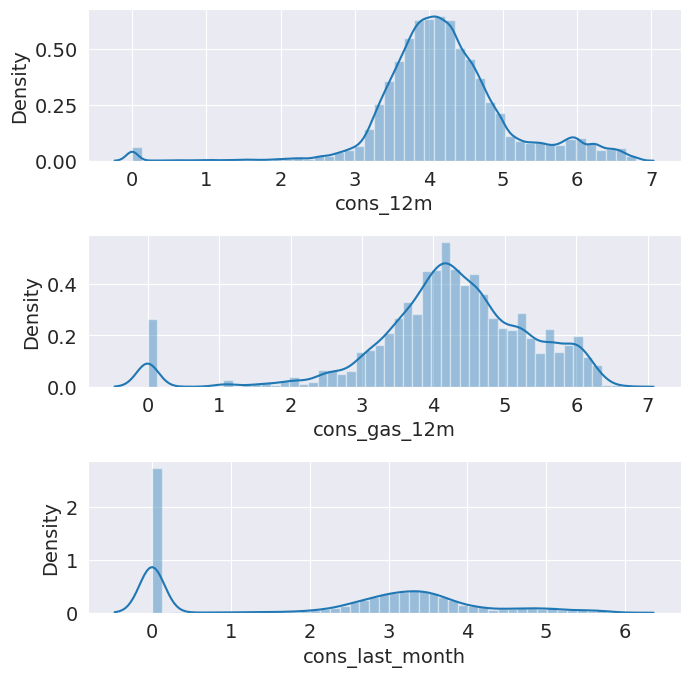

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(7, 7))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

### Correlation Heatmap

Checking for multi-collinearity

In [ ]:
# Defining correlation
correlation = df.corr()

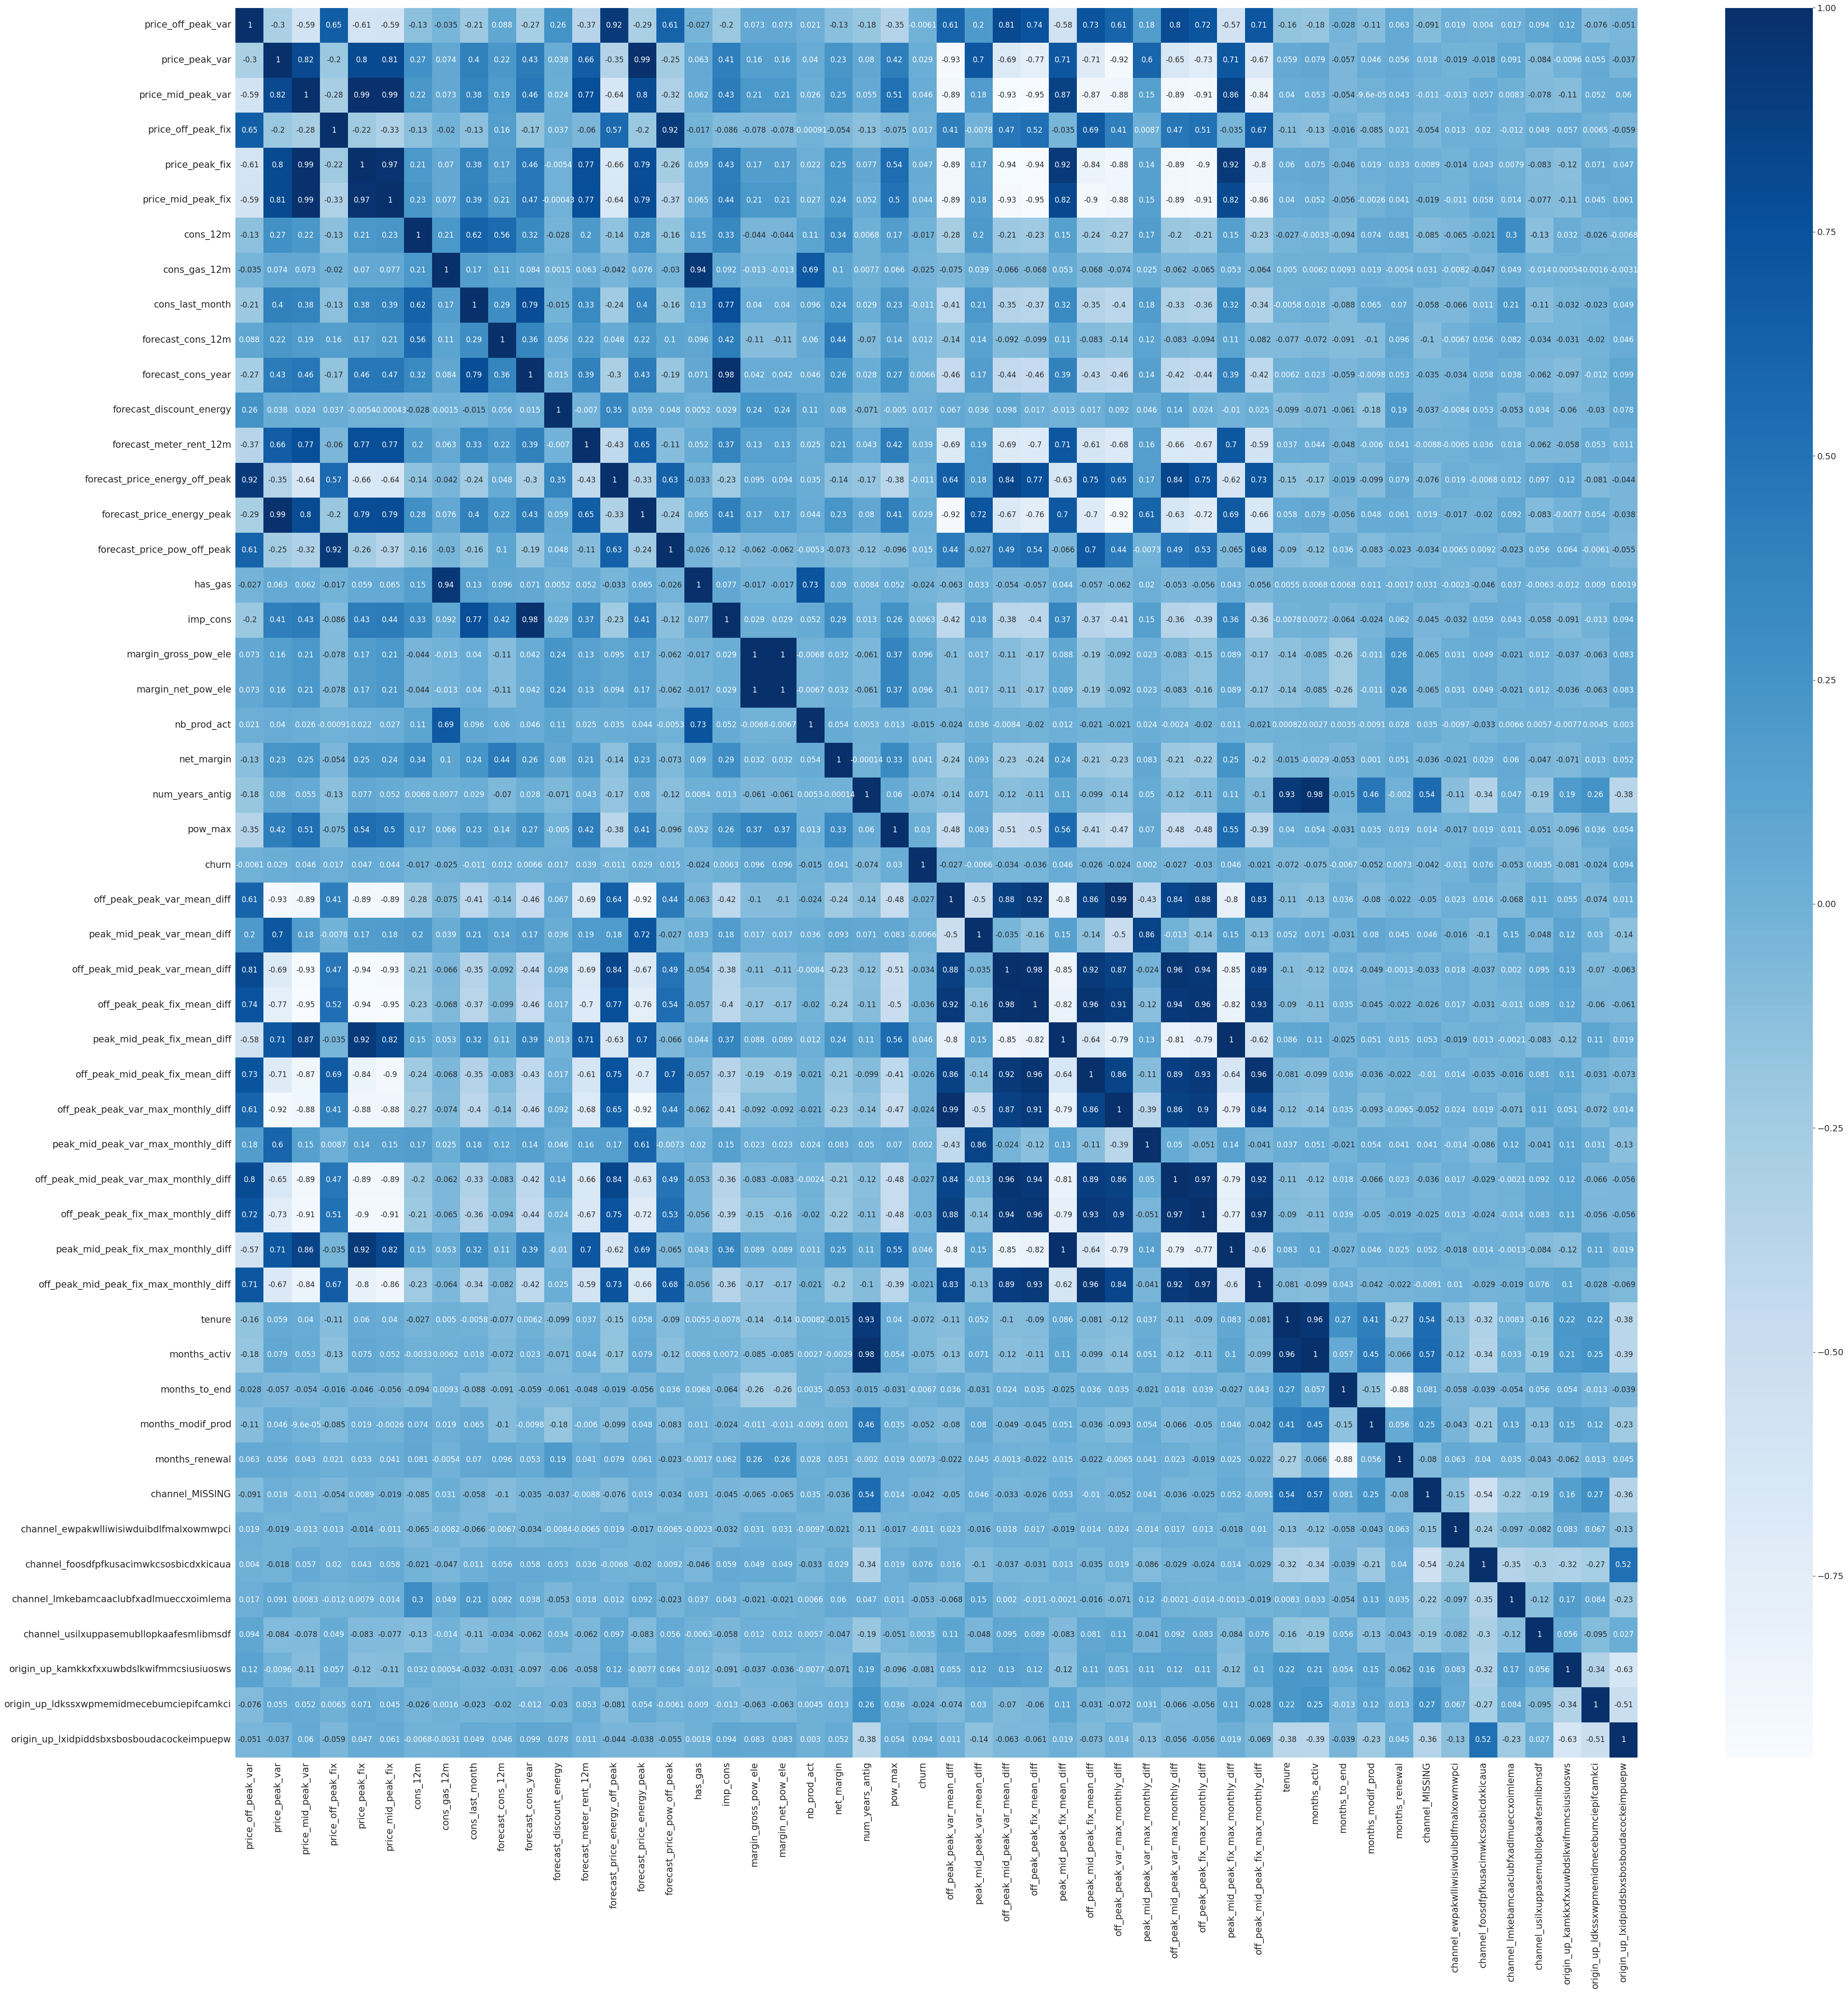

In [ ]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12},
    cmap = "Blues"
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
len(df.columns)

52

Features with high multi-collinearity basically relay the same information, and can be dropped.

But we will keep all the features for modelling as there are only a few instances of extremely high collinearity.

We will only drop 'price_date' and 'id' features, not because of collinearity, but because these features are not required for modeling.

In [ ]:
df = df.drop(columns=['price_date','id'])

---
## 5. Modeling

We now have a dataset containing features that we have engineered and we are ready to start training a Random Forest predictive model.

In [ ]:
# Importing libraries

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data Sampling

To build a predictive model, it is necessary to split/sample our dataset into test and train dataset.

Here, we will use a 80-20 split, which means that the test_set will have 80% of the data and train_set will have 20% of the data.

In [ ]:
# duplicating our dataframe for redundancy
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['churn'])
print(X.shape)
print(y.shape)

(175149, 49)
(175149,)


In [ ]:
# Sampling into test and train datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140119, 49)
(140119,)
(35030, 49)
(35030,)


### Training the Model

Here we are using n_estimators = 1000. 

This means that my random forest will consist of 1000 decision trees.

There are many more parameters that we can fine-tune within the random forest to find the optimal combinations of parameters.

In [57]:
# Building the Random Forest model

model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

### Model Evaluation

Now, we will use the test datasets to evaluate our model's performance.

We are going to use 3 metrics to evaluate performance:

* Accuracy = the ratio of correctly predicted observations to the total observations
* Precision = the ability of the classifier to not label a negative sample as positive
* Recall = the ability of the classifier to find all the positive samples

The reason why we are using these three metrics is because a simple accuracy is not a reliable metric to consider.

In [58]:
# Making predictions on the test datasets

predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [59]:
# Our actual test dataset output value_counts

y_test.value_counts()

0    31685
1     3345
Name: churn, dtype: int64

Let us observe our confusion matrix, but in a descriptive manner.

In [60]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 3345
False positives: 0
True negatives: 31685
False negatives: 0

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


* Within the test set 3345 out of 35030 (9.5%) of the rows are churn customers (churn = 1).
* **True Values**: We have predicted 100% of all the test cases with no errors. This is great!
* **False Values**: We haven't predicted any false values in our test cases. This confirms our true positives and true negatives.

* All three of our evaluation metrices (Accuracy, precision and recall) confirm that our Random Forest model is able to make perfect predictions.

So overall, we're able to very accurately identify clients that do and do not churn.

Hence, there is no need to further optimise our Random Forest Classifier model.

### Understanding our model

A simple way of understanding the results of a model is to look at feature importances. 

Feature importance indicates the importance of all features within the predictive model, there are several ways to calculate feature importance, but with the Random Forest classifier, we're able to extract feature importances using the built-in method on the trained model.

In the Random Forest, the feature importance represents the number of times each feature is used for splitting across all trees.

In [61]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

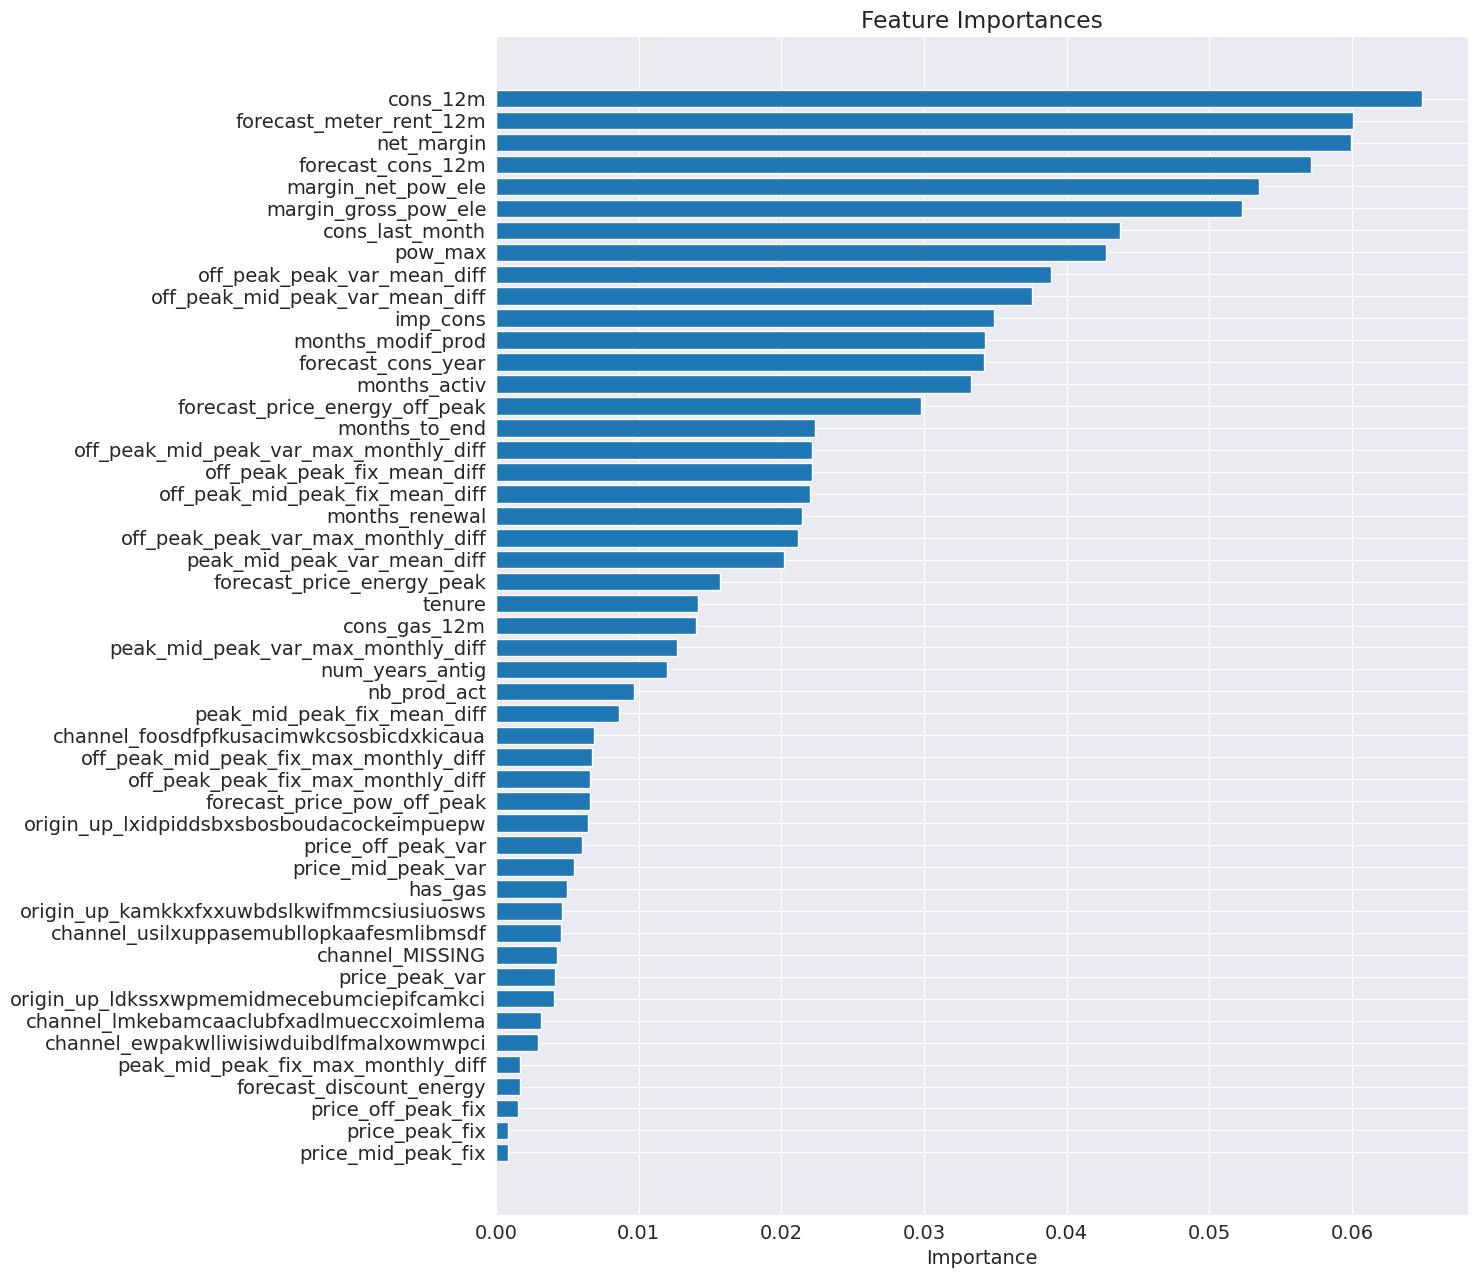

In [66]:
plt.figure(figsize=(15,13))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

* Net margin and consumption over 12 months is a top driver for churn in this model.
* Margin on power subscription also is an influential driver.
* Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract.
* The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it.
* The price sensitivity features that we created are scattered around but is not the main driver for customer churning.

#### Hypothesis Confirmation:

The last important observation relates back to our original hypothesis:

`Is churn driven by the customers' price sensitivity?`

Based on the feature importance plot, "Price Sensitivity" is not a main factor but it is a weak contributor.

However, to arrive at a conclusive result, more experimentation is needed.

## Saving Model to Pickle file

In [97]:
import pickle
pickle.dump(model,open('Model_Powerco.pkl','wb'))